## **NASNetLarge Model**

### **1. Import the necessary libraries**

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.10.1


### **2. Run the following codes with CUDA GPU enabled**

In [14]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


### **3. Building NasNetLarge Model**


In [15]:
# Function to create NASNetLarge model with customized top layers
def create_nasnetlarge_model(learning_rate=0.0001, dropout_rate=0.5, dense_units=256):
    # Load NASNetLarge base model without top layers
    base_model = tf.keras.applications.NASNetLarge(
        weights='imagenet',  # Load weights pre-trained on ImageNet
        include_top=False,   # Exclude the top layers
        input_shape=(331, 331, 3)  # Define input shape matching your data
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Create new model on top
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='softmax'))  # Adjust output units based on your classification task
    
    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

### **4. Train the Model**

Fold 1
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.2088 - accuracy: 0.5938
Epoch 1: val_accuracy improved from -inf to 0.80208, saving model to nasnetlarge_fold_0.h5
48/48 [==============================] - 17s 200ms/step - loss: 1.2088 - accuracy: 0.5938 - val_loss: 0.5858 - val_accuracy: 0.8021
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.7046 - accuracy: 0.7396
Epoch 2: val_accuracy did not improve from 0.80208
48/48 [==============================] - 5s 97ms/step - loss: 0.7046 - accuracy: 0.7396 - val_loss: 0.5839 - val_accuracy: 0.7708
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.7448
Epoch 3: val_accuracy improved from 0.80208 to 0.83333, saving model to nasnetlarge_fold_0.h5
48/48 [==============================] - 6s 130ms/step - loss: 0.7155 - accuracy: 0.7448 - val_loss: 0.5165 - val_accuracy: 0.833

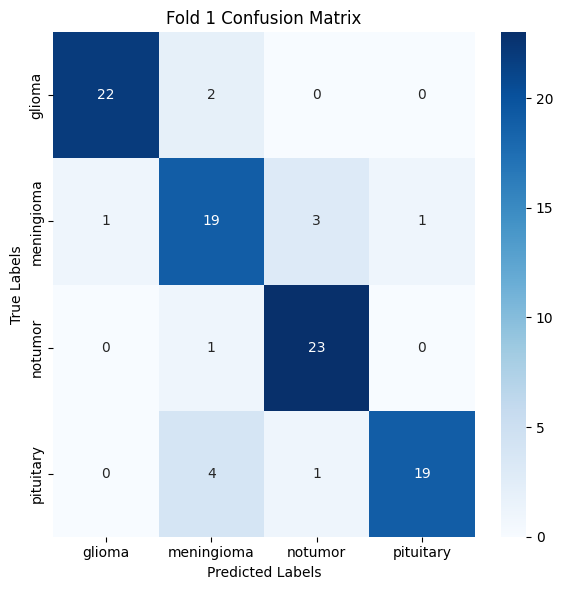

Fold 2
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.3550 - accuracy: 0.5677
Epoch 1: val_accuracy improved from -inf to 0.60417, saving model to nasnetlarge_fold_1.h5
48/48 [==============================] - 19s 212ms/step - loss: 1.3550 - accuracy: 0.5677 - val_loss: 1.0554 - val_accuracy: 0.6042
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.8120 - accuracy: 0.6927
Epoch 2: val_accuracy improved from 0.60417 to 0.78125, saving model to nasnetlarge_fold_1.h5
48/48 [==============================] - 6s 135ms/step - loss: 0.8120 - accuracy: 0.6927 - val_loss: 0.6472 - val_accuracy: 0.7812
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.8000 - accuracy: 0.7135
Epoch 3: val_accuracy did not improve from 0.78125
48/48 [==============================] - 5s 99ms/step - loss: 0.8000 - accuracy: 0.7135 - val_loss: 0.6633 - val_accuracy: 0.760

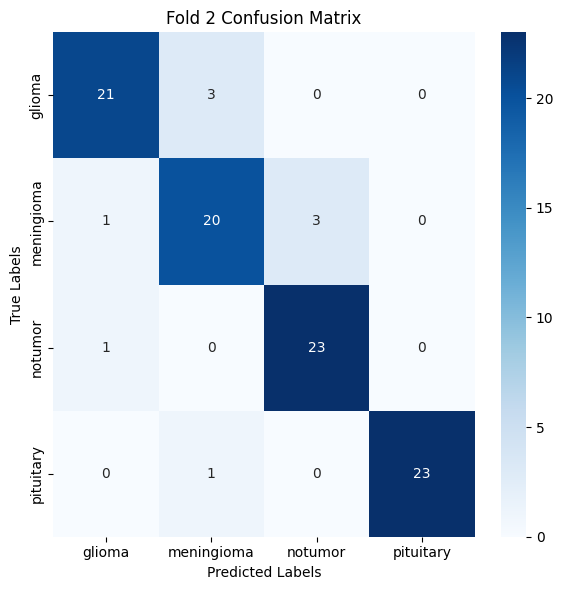

Fold 3
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.1049 - accuracy: 0.5833
Epoch 1: val_accuracy improved from -inf to 0.67708, saving model to nasnetlarge_fold_2.h5
48/48 [==============================] - 19s 213ms/step - loss: 1.1049 - accuracy: 0.5833 - val_loss: 0.8764 - val_accuracy: 0.6771
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.7633 - accuracy: 0.7292
Epoch 2: val_accuracy improved from 0.67708 to 0.68750, saving model to nasnetlarge_fold_2.h5
48/48 [==============================] - 6s 134ms/step - loss: 0.7633 - accuracy: 0.7292 - val_loss: 0.8367 - val_accuracy: 0.6875
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.7370
Epoch 3: val_accuracy improved from 0.68750 to 0.77083, saving model to nasnetlarge_fold_2.h5
48/48 [==============================] - 7s 143ms/step - loss: 0.6869 - accuracy: 0.7

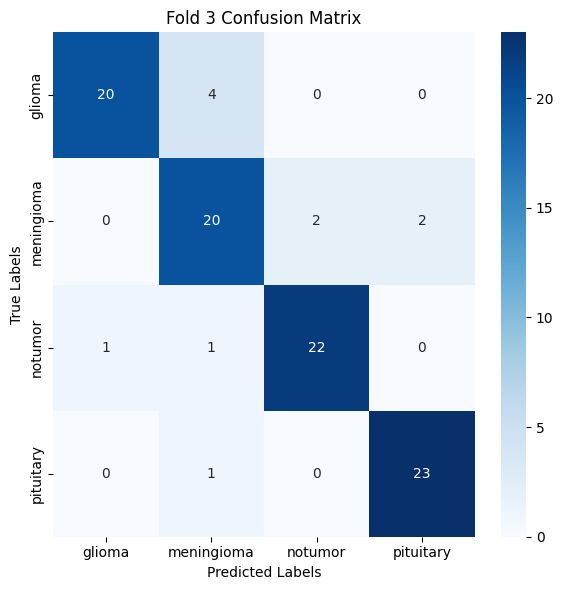

Fold 4
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.1898 - accuracy: 0.5417
Epoch 1: val_accuracy improved from -inf to 0.72917, saving model to nasnetlarge_fold_3.h5
48/48 [==============================] - 20s 238ms/step - loss: 1.1898 - accuracy: 0.5417 - val_loss: 0.7733 - val_accuracy: 0.7292
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.7781 - accuracy: 0.7188
Epoch 2: val_accuracy improved from 0.72917 to 0.77083, saving model to nasnetlarge_fold_3.h5
48/48 [==============================] - 7s 145ms/step - loss: 0.7781 - accuracy: 0.7188 - val_loss: 0.5947 - val_accuracy: 0.7708
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.7552
Epoch 3: val_accuracy improved from 0.77083 to 0.78125, saving model to nasnetlarge_fold_3.h5
48/48 [==============================] - 7s 147ms/step - loss: 0.7194 - accuracy: 0.7

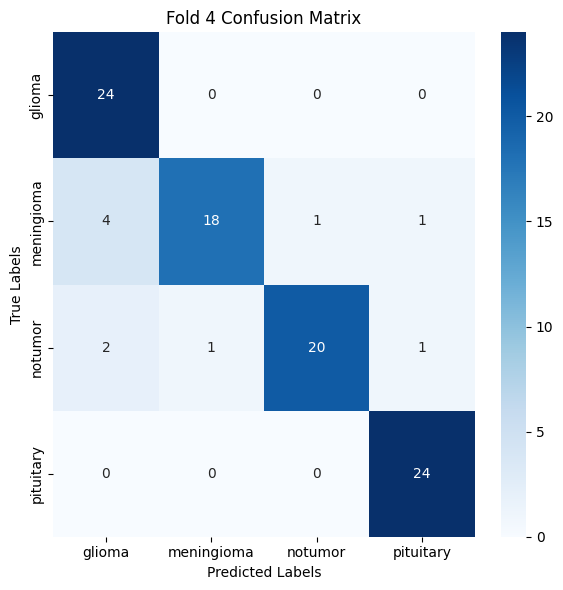

Fold 5
Found 384 images belonging to 4 classes.
Found 96 images belonging to 4 classes.
Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 1.1857 - accuracy: 0.5781
Epoch 1: val_accuracy improved from -inf to 0.64583, saving model to nasnetlarge_fold_4.h5
48/48 [==============================] - 18s 201ms/step - loss: 1.1857 - accuracy: 0.5781 - val_loss: 0.9691 - val_accuracy: 0.6458
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.8229 - accuracy: 0.6979
Epoch 2: val_accuracy improved from 0.64583 to 0.76042, saving model to nasnetlarge_fold_4.h5
48/48 [==============================] - 6s 134ms/step - loss: 0.8229 - accuracy: 0.6979 - val_loss: 0.6995 - val_accuracy: 0.7604
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.6872 - accuracy: 0.7552
Epoch 3: val_accuracy did not improve from 0.76042
48/48 [==============================] - 5s 100ms/step - loss: 0.6872 - accuracy: 0.7552 - val_loss: 0.7095 - val_accuracy: 0.76

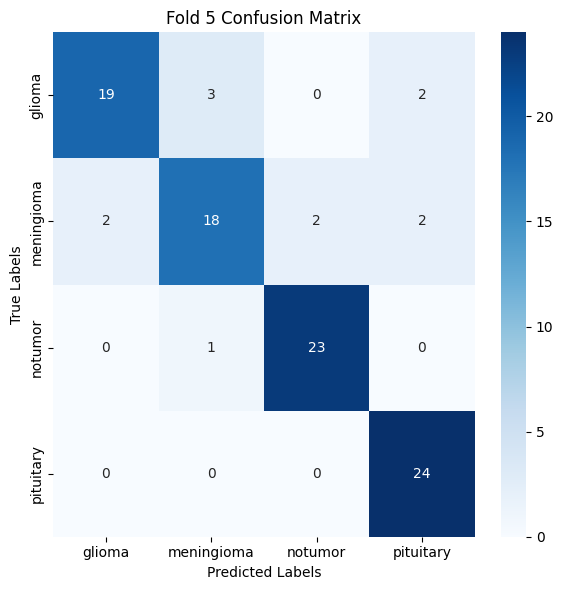

In [16]:
# Define parameters
learning_rate = 0.001
dropout_rate = 0.5
dense_units = 256
n_splits = 5
epochs = 100
batch_size = 8

# Initialize dictionary to store models and histories
models = {}

# Iterate over K-fold splits
for fold in range(n_splits):
    print(f"Fold {fold + 1}")

    # Define paths for current fold
    train_dir = f"kfold_dataset_331/train_fold_{fold}"
    val_dir = f"kfold_dataset_331/val_fold_{fold}"

    # ImageDataGenerator for data augmentation and normalization
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )

    val_datagen = ImageDataGenerator(rescale=1.0 / 255)

    # Flow training images in batches using train_datagen generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(331, 331),
        batch_size=batch_size,
        class_mode="categorical",
    )

    # Flow validation images in batches using val_datagen generator
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(331, 331),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
    )

    # Create and compile model
    model = create_nasnetlarge_model(
        learning_rate=learning_rate, dropout_rate=dropout_rate, dense_units=dense_units
    )

    # Define callbacks
    checkpoint_callback = ModelCheckpoint(
        filepath=f"nasnetlarge_fold_{fold}.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        verbose=1,
    )

    early_stopping_callback = EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        restore_best_weights=True,
    )

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[checkpoint_callback, early_stopping_callback],
        verbose=1,
    )

    # Evaluate and store model performance
    val_accuracy = max(history.history["val_accuracy"])
    val_loss = min(history.history["val_loss"])

 # Predict labels for validation set
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = val_generator.classes

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    models[fold] = {
        "model": model,
        "history": history.history,
        "val_accuracy": val_accuracy,
        "val_loss": val_loss,
        "conf_matrix": conf_matrix,
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=val_generator.class_indices,
        yticklabels=val_generator.class_indices,
    )
    plt.title(f"Fold {fold + 1} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_fold_{fold}.png")
    plt.show()

# Save the best model
best_model_fold = max(models, key=lambda k: models[k]["val_accuracy"])
models[best_model_fold]["model"].save("best_nasnetlarge_model.h5")

### **5. Evaluate and Visualize Results**

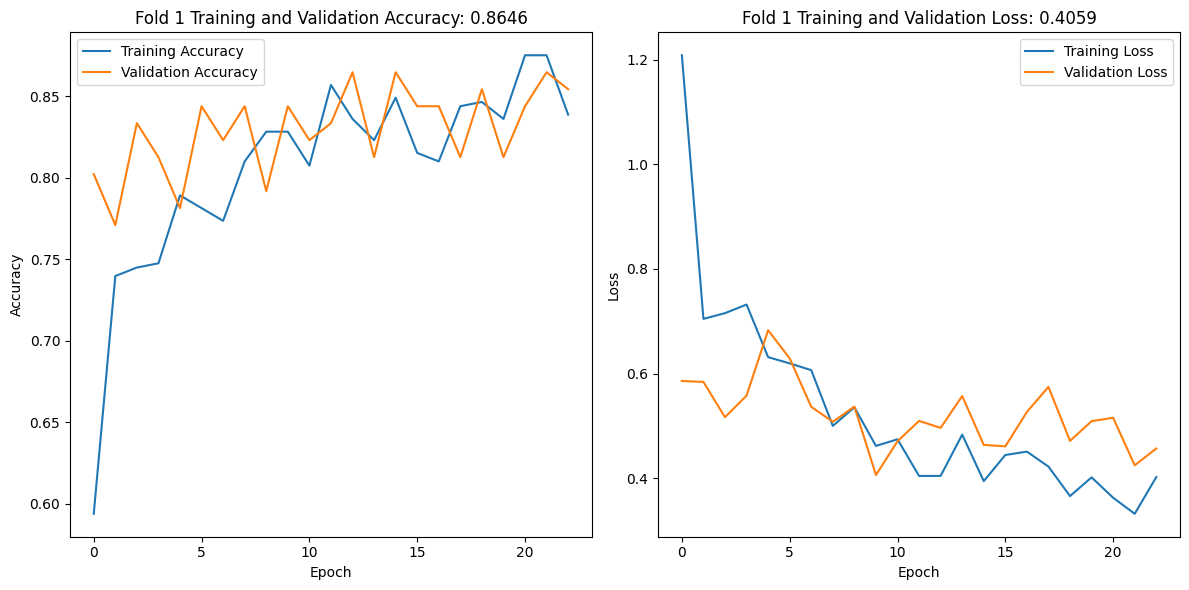

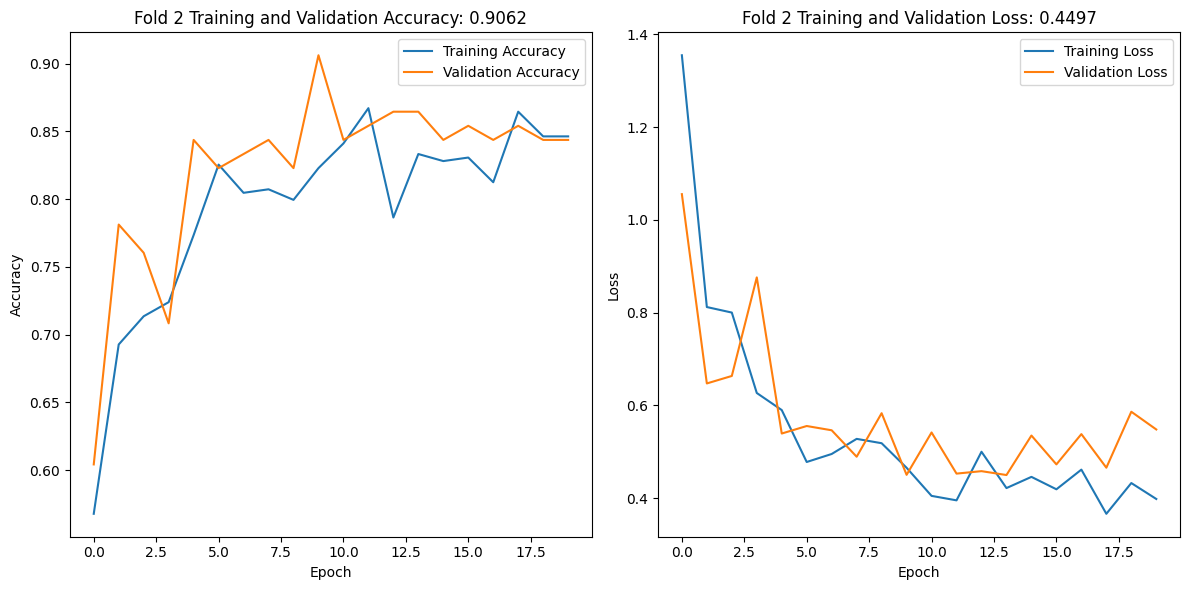

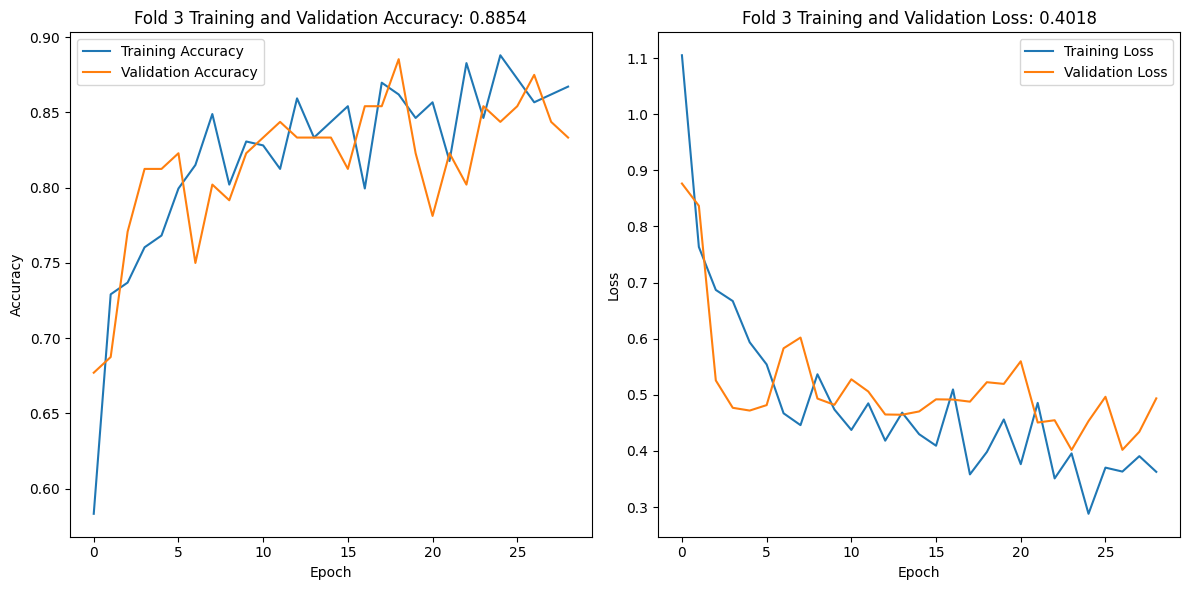

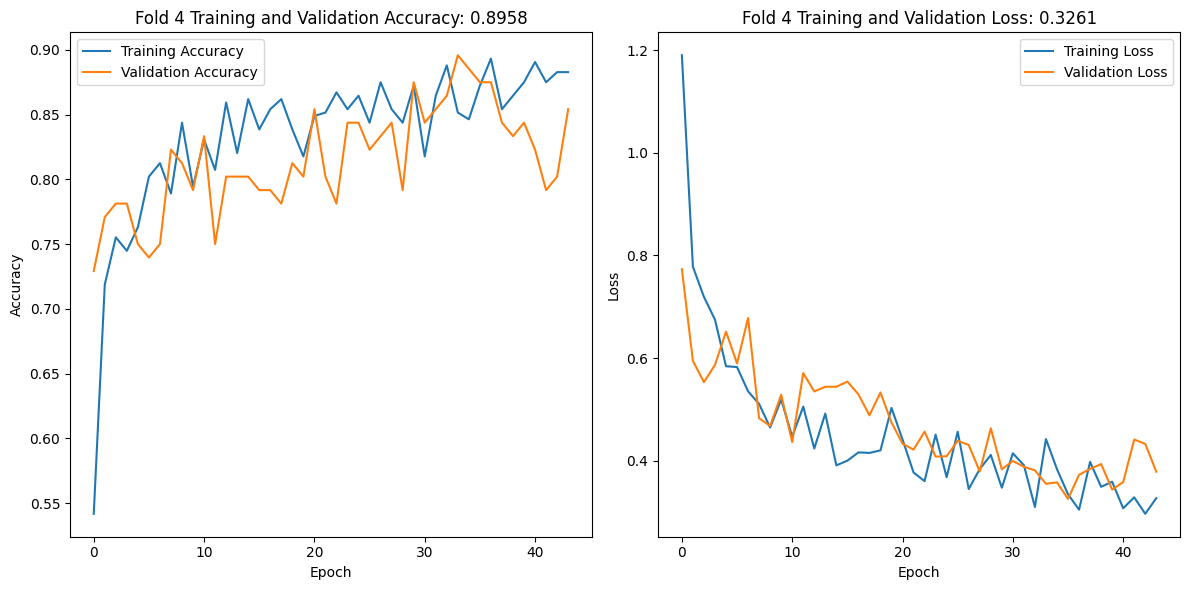

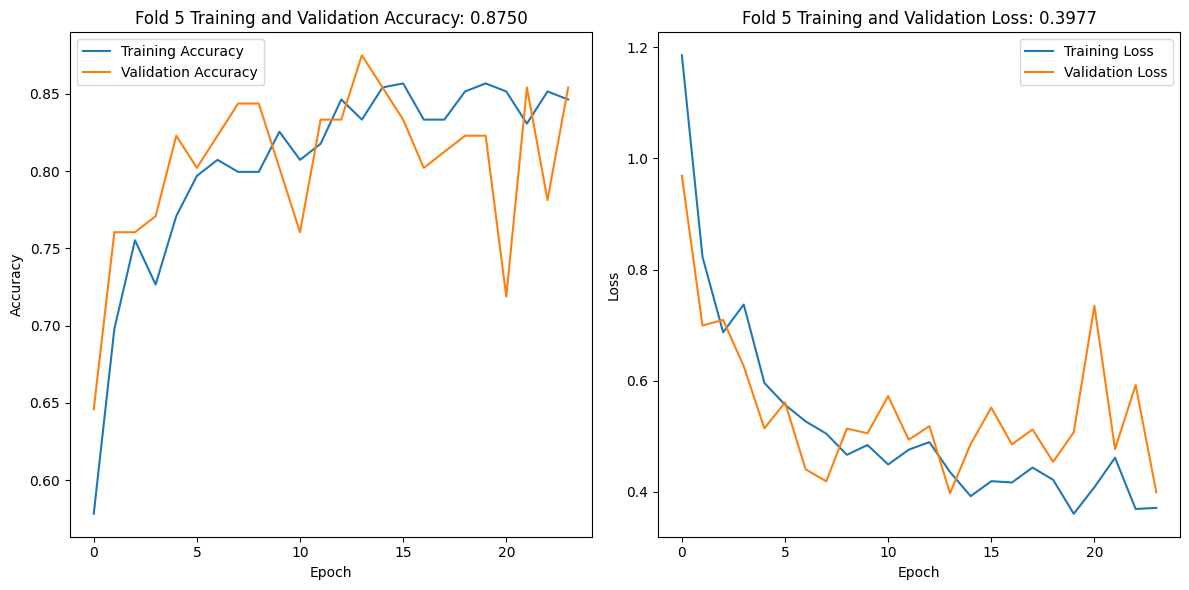

In [17]:
# Plot training history for all folds
for fold, result in models.items():
    plt.figure(figsize=(12, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(result["history"]["accuracy"], label="Training Accuracy")
    plt.plot(result["history"]["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Fold {fold + 1} Training and Validation Accuracy: {result['val_accuracy']:.4f}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(result["history"]["loss"], label="Training Loss")
    plt.plot(result["history"]["val_loss"], label="Validation Loss")
    plt.title(f"Fold {fold + 1} Training and Validation Loss: {result['val_loss']:.4f}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()